In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adaptedsyntehticdata/adapted_GaussianCopula.csv
/kaggle/input/rare-df/df_rare.csv
/kaggle/input/synthetic-data/synthetic_data_CTGANS_v2.csv
/kaggle/input/synthetic-data/synthetic_data_CopulaGANS_v2.csv
/kaggle/input/synthetic-data/synthetic_data_GaussianCopula_v2.csv
/kaggle/input/agumented-rare/augmented_df.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv
/kaggle/input/synthetic-data-v1/synthetic_data_CopulaGANSynthesizer_v1.csv
/kaggle/input/synthetic-data-v1/synthetic_data_GaussianCopula_v1.csv
/kaggle/input/synthetic-data-v1/synthetic_data_TVAESynthesizer_v1.csv
/kaggle/input/synthetic-data-v1/synthetic_data_CTGANS_v1.csv


In [2]:
pip install imbalanced-learn==0.12.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 4.3 MB/s eta 0:00:0000:01
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn==1.4.1


ERROR: Could not find a version that satisfies the requirement scikit-learn==1.4.1 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21.1, 0.21.2, 0.21.3, 0.22, 0.22.1, 0.22.2.post1, 0.23.0, 0.23.1, 0.23.2, 0.24.0, 0.24.1, 0.24.2, 1.0, 1.0.1, 1.0.2, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.2.0rc1, 1.2.0, 1.2.1, 1.2.2, 1.3.0rc1, 1.3.0, 1.3.1, 1.3.2, 1.4.0rc1, 1.4.0, 1.4.1.post1, 1.4.2, 1.5.0rc1, 1.5.0, 1.5.1, 1.5.2, 1.6.0rc1, 1.6.0, 1.6.1, 1.7.0rc1, 1.7.0)
ERROR: No matching distribution found for scikit-learn==1.4.1
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Basic eploratory data analysis over our diabetes health indicators dataset

In [5]:
df = pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
print(df.head())

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0   

In [7]:
df.shape

(70692, 22)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [9]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.columns.to_list()

In [ ]:
df.isnull().sum()

/tmp/ipykernel_35/578845120.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


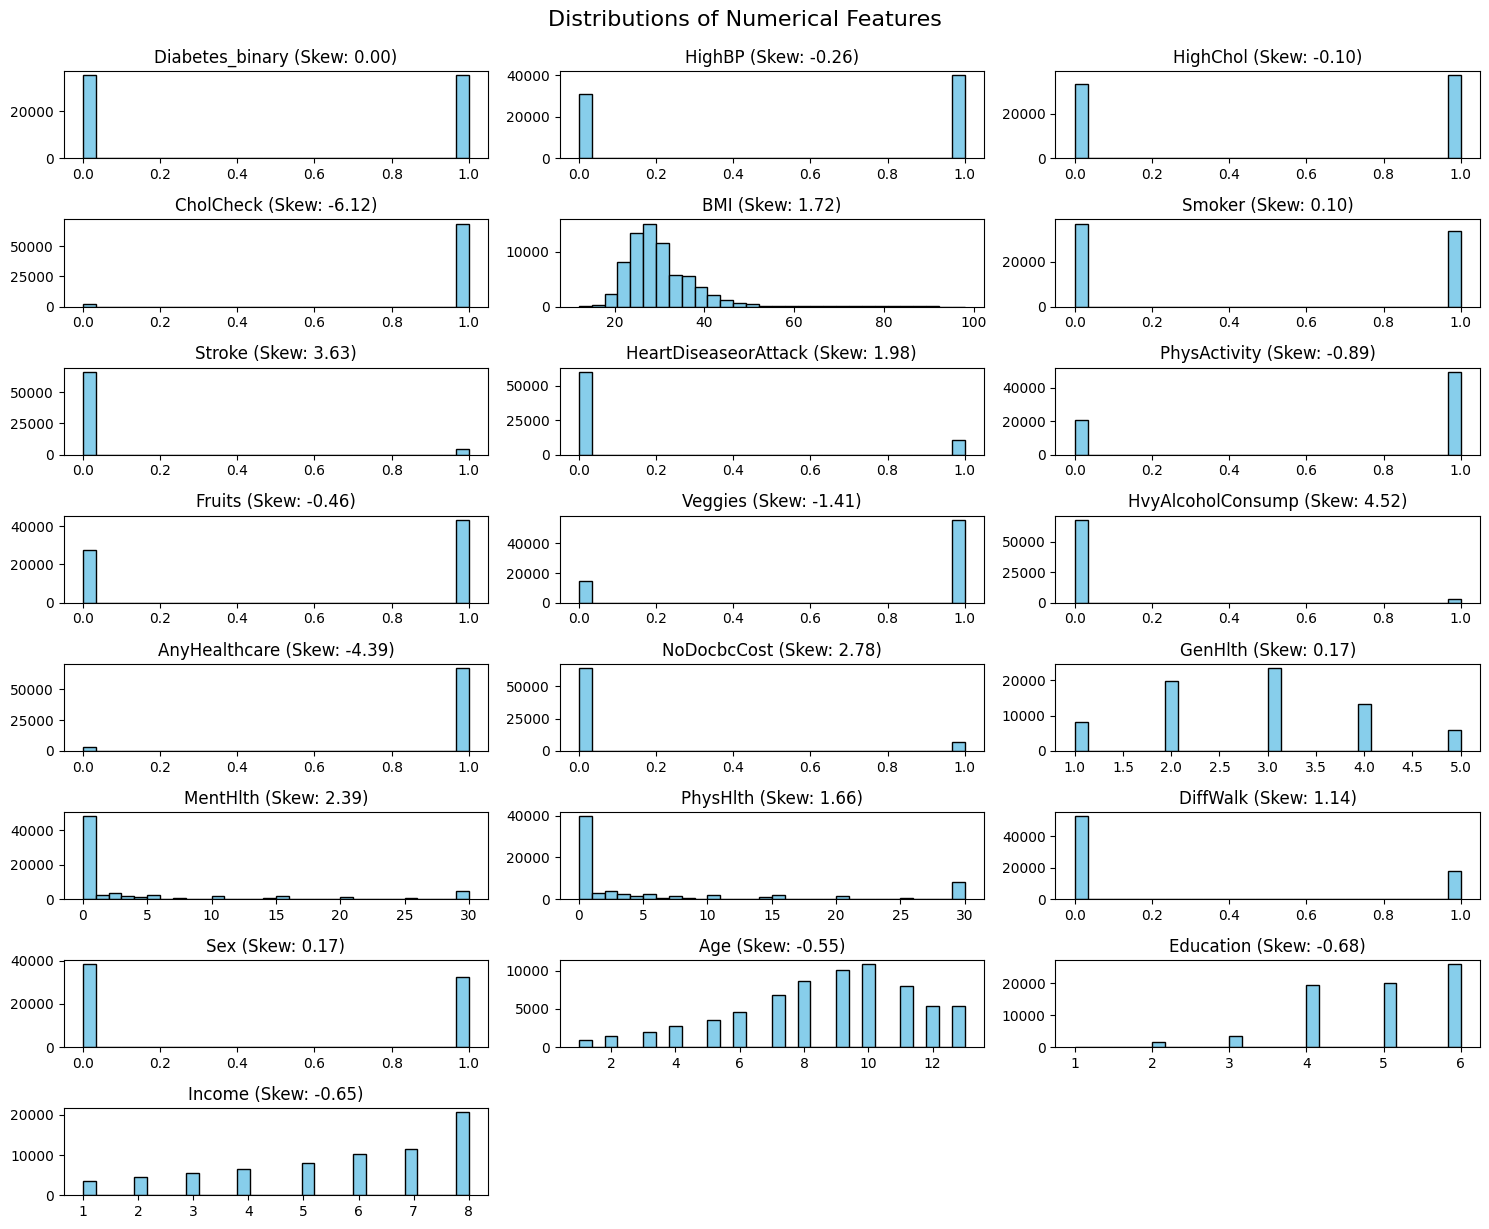

In [9]:


# Assuming df is your original unscaled DataFrame
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Plot histograms
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i + 1)
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{col} (Skew: {df[col].skew():.2f})')
    plt.tight_layout()

plt.suptitle('Distributions of Numerical Features', fontsize=16, y=1.02)
plt.show()



# 📊 Exploratory Data Analysis (EDA) Summary
Based on the visualized distributions and skewness values for key features in the dataset:

✅ Key Findings
**Diabetes Distribution**

1. The number of people without diabetes is significantly higher—approximately twice the number of people with diabetes.

2. The target variable Diabetes_012 is heavily imbalanced (skewness = 1.98), which may affect classification performance.

**BMI Distribution**

3. The majority of the population has a BMI between 22–30, peaking around 25.

4. The distribution is right-skewed (skewness = 1.72), indicating that a smaller group has very high BMI values.

**Mental Health**

5. A majority of individuals reported good mental health, with most having zero mentally unhealthy days.

6. However, the long right tail (skewness = 2.72) suggests that a small subset experiences chronic mental health issues.

**General Health Perception**

7. Most people rated their health as “good” or “very good”, as seen from the peak values in GenHlth.

**Physical Health**

8. Most individuals report zero physically unhealthy days, indicating overall good physical health.

**Age Distribution**

9. The age variable appears binned into ~13 categories, not continuous.

10. The distribution shows a slight left skew (skewness = -0.55), and diabetics tend to belong to older age groups.

**Education and Income**

11. Most participants are well-educated, with peaks at mid to high education levels.

12. A large portion have higher income levels (e.g., $75,000+), though the distribution is left-skewed (skewness = -0.65), indicating that high-income individuals are more frequent.

**Additional Insights**
Several variables are right-skewed, which might require transformation (e.g., log, sqrt) before applying certain machine learning models.

Ordinal variables like GenHlth and Age should be treated carefully in modeling — likely best handled as ordinal/categorical features.

Health-related features (MentHlth, PhysHlth) show that while most people are healthy, there's a non-trivial minority with chronic issues, important for health-focused predictions.

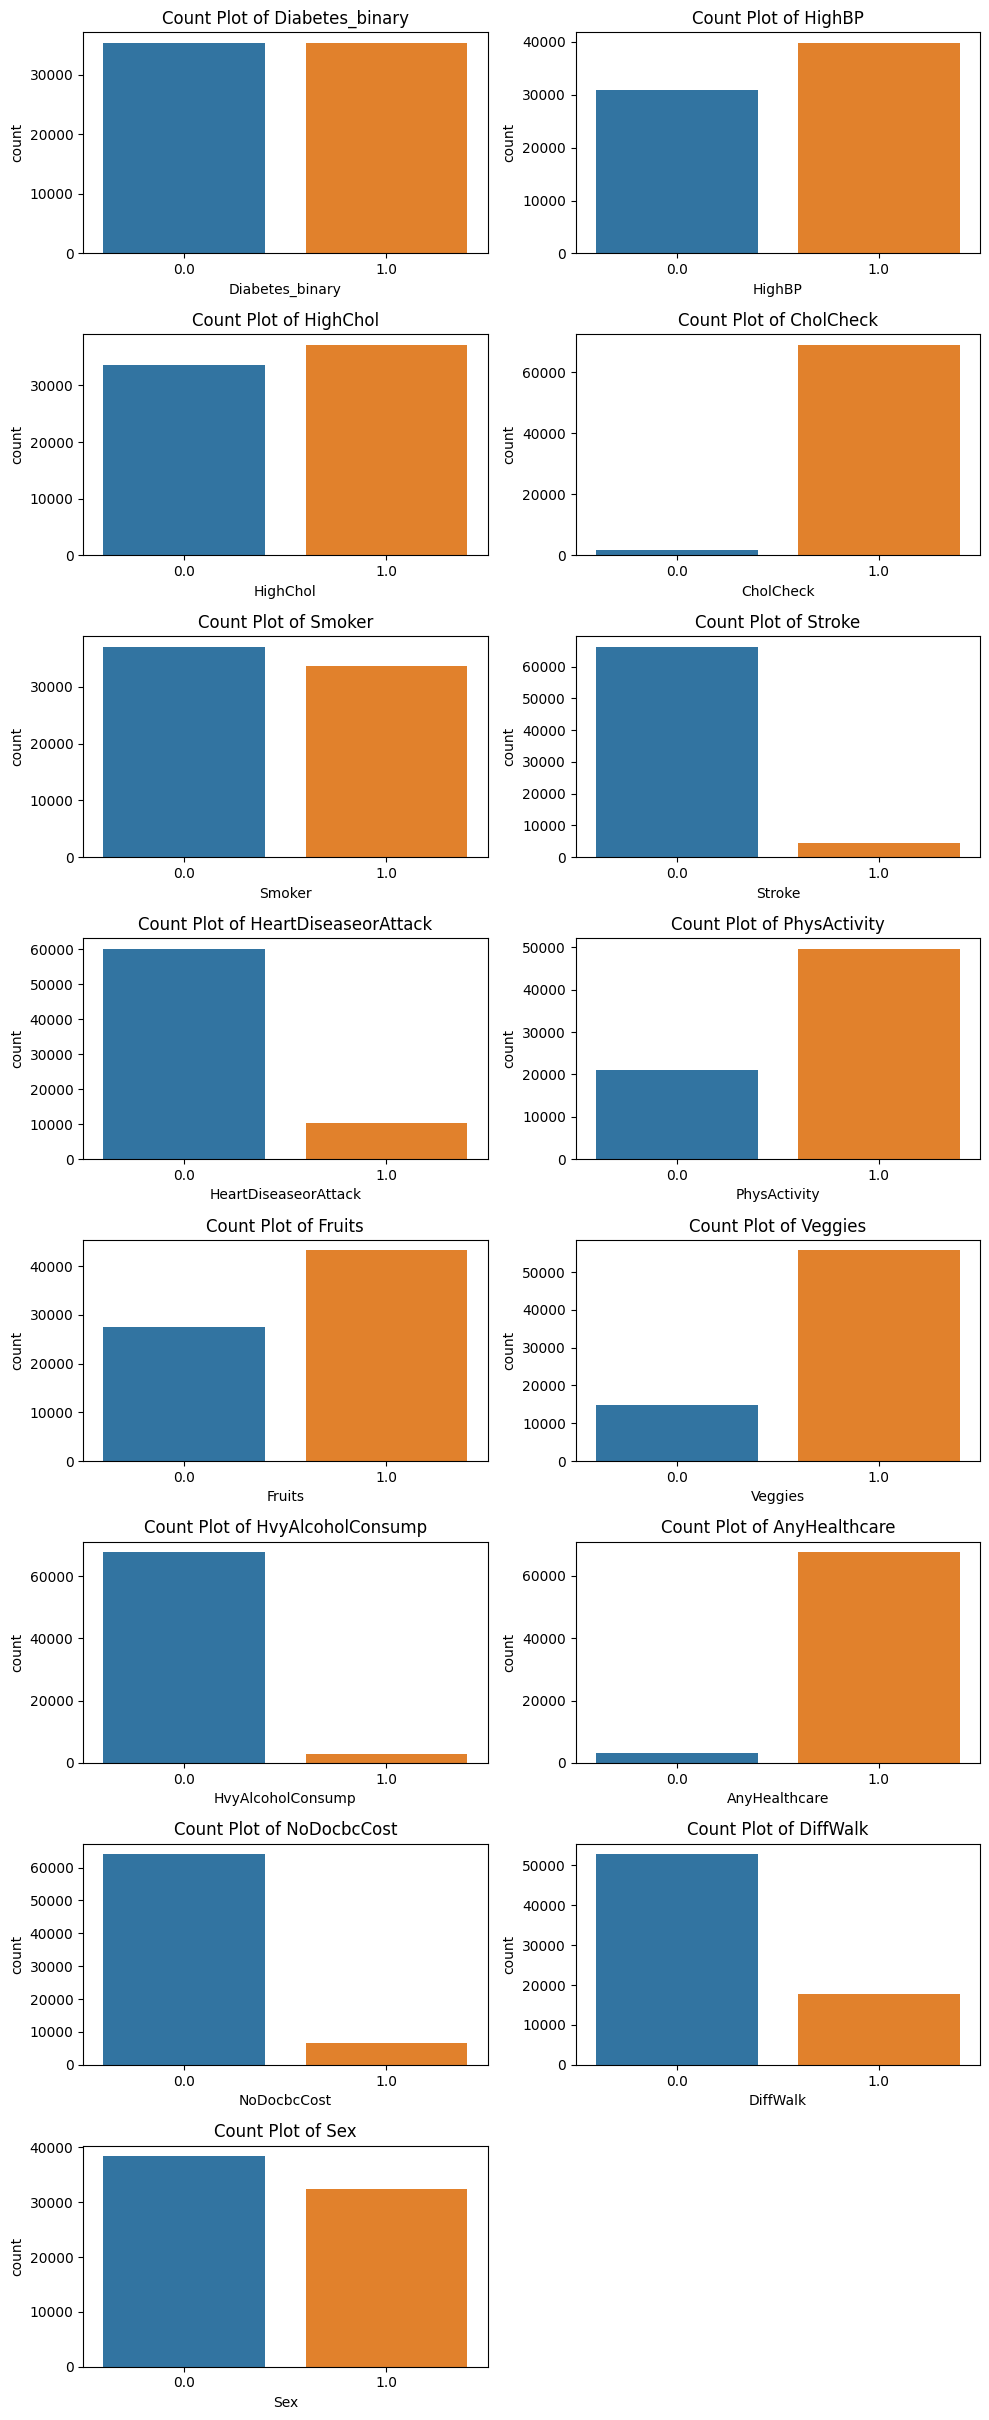

In [10]:
# Plot binary/categorical features separately
categorical_columns = [col for col in df.columns 
                       if df[col].nunique() == 2 and df[col].dtype in ['int64', 'float64']]

plt.figure(figsize=(10, len(categorical_columns) * 3))
for idx, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 2, idx)
    sns.countplot(data=df, x=col,)  # optional hue
    plt.title(f"Count Plot of {col}")

plt.tight_layout()
plt.show()


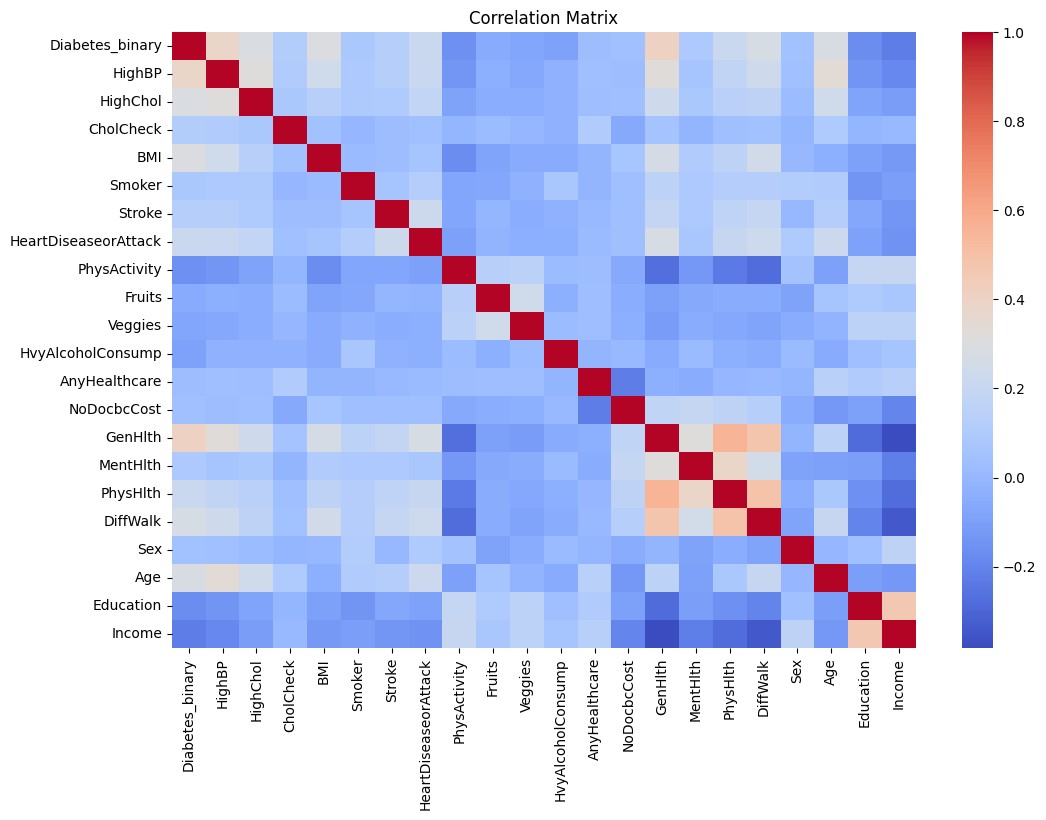

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


**🔍Top Positive Correlations with Diabetes (Diabetes_012)** 
These features might be useful predictors:

**GenHlth (0.30)***: Worse general health is associated with diabetes.

**HighBP (0.27)** and Age (0.19): Hypertension and older age are common comorbidities.

**DiffWalk (0.22)**: Difficulty walking is more common among diabetics.

**BMI (0.22)**: Higher BMI correlates with diabetes.

**HeartDiseaseorAttack (0.18) and PhysHlth (0.18)**:  Poor physical health and comorbidities are relevant.

**🔻 Negative Correlations**
These might be protective or lifestyle indicators:

**Income (-0.17) and Education (-0.13)**: Lower socioeconomic status correlates with higher diabetes prevalence.

**PhysActivity (-0.12)**: More physical activity is associated with lower diabetes risk.

Feature Selection: Prioritize GenHlth, HighBP, BMI, and DiffWalk for predictive modeling.

Address Multicollinearity: Drop one of PhysHlth/GenHlth or Income/Education if building a regression model.

# Feature engineering 

In [ ]:
# df['BMI_log'] = np.log1p(df['BMI'])  # log1p avoids log(0)
# df['Stroke_log'] = np.log1p(df['Stroke'])  # log1p avoids log(0)
# df['HeartDiseaseorAttack_log'] = np.log1p(df['HeartDiseaseorAttack'])  # log1p avoids log(0)
# df['HvyAlcoholConsump_log'] = np.log1p(df['HvyAlcoholConsump'])  # log1p avoids log(0)
# df['NoDocbcCost_log'] = np.log1p(df['NoDocbcCost'])  # log1p avoids log(0)
# df['MentHlth_log'] = np.log1p(df['MentHlth'])  # log1p avoids log(0)
# df['PhysHlth_log'] = np.log1p(df['PhysHlth'])  # log1p avoids log(0)
# df['DiffWalk_log'] = np.log1p(df['DiffWalk'])  # log1p avoids log(0)


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(X_scaled, y)
# importances = model.feature_importances_

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Create a DataFrame for visualization
# feature_names = X_scaled.columns  # If X_scaled is a DataFrame
# importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# importances_df = importances_df.sort_values(by='Importance', ascending=False)

# # Plot
# plt.figure(figsize=(10, 6))
# plt.barh(importances_df['Feature'], importances_df['Importance'])
# plt.xlabel('Importance')
# plt.title('Feature Importances from Random Forest')
# plt.gca().invert_yaxis()
# plt.show()


In [ ]:
# threshold = 0.015
# selected_features = importances_df[importances_df['Importance'] > threshold]['Feature']
# X = df[selected_features]
# y = df['Diabetes_binary']  # or your target column name

# # Drop features with importance <= threshold
# low_importance_features = importances_df[importances_df['Importance'] <= threshold]['Feature']
# df = df.drop(columns=low_importance_features)


# Training simple models on real data

In [23]:
# Dropping the target column
X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [26]:

#spliting the dataset for traaining and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:


logreg = LogisticRegression(max_iter = 1000 , random_state= 42)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



Confusion Matrix:
 [[5156 1934]
 [1622 5427]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139


Accuracy Score: 0.7484970648560718


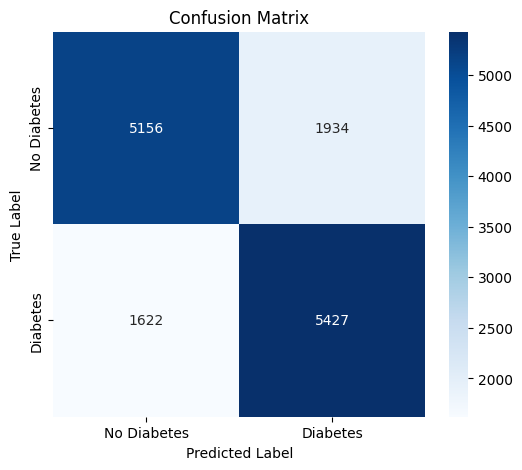

In [28]:


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.73      7090
         1.0       0.72      0.78      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



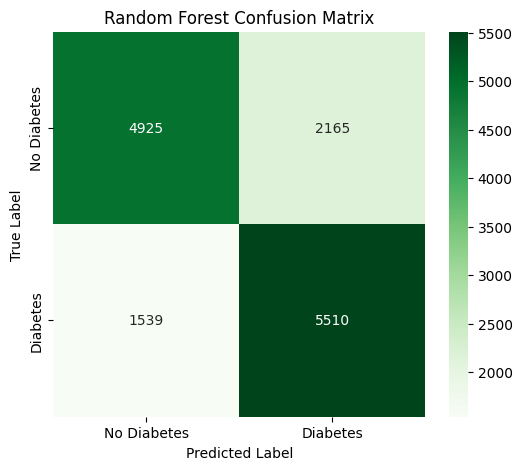

In [29]:


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()


# Generating synthetic data

**1.GaussianCopulaSynthesizer**

In [17]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 45.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:000:00:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 

In [37]:

from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=df)

synthesizer = GaussianCopulaSynthesizer(metadata)

synthesizer.fit(df)

synthetic_data = synthesizer.sample(num_rows=70000)

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:162: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:128: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
synthetic_data.to_csv('synthetic_data_GaussianCopula_v1.csv', index=False)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

X_syn = synthetic_data.drop(columns=["Diabetes_binary"])
y_syn = synthetic_data["Diabetes_binary"]

X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_syn, y_syn, test_size=0.2, random_state=42)

X_syn_train_scaled = scaler.fit_transform(X_syn_train)
X_syn_test_scaled = scaler.transform(X_syn_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_syn_train_scaled, y_syn_train)

y_pred = model.predict(X_test_scaled)  # Real test set from earlier
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=42)
rf.fit(X_syn_train_scaled, y_syn_train)

y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()


NameError: name 'X_syn_train_scaled' is not defined

2. **CTGAN**

In [ ]:
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata


In [ ]:
synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(df)
synthetic_data = synthesizer.sample(num_rows=70000)  


In [ ]:
synthetic_data.to_csv('synthetic_data_CTGANS_v1.csv', index=False)

In [ ]:
synthetic_data = pd.read_csv('/kaggle/working/synthetic_data_CTGANS_v1.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target (adjust 'target_column' to your actual column name)
target_column = 'Diabetes_binary'  # change this if your column name is different
X_syn = synthetic_data.drop(columns=[target_column])
y_syn = synthetic_data[target_column]

X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_syn, y_syn, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_syn_train_scaled = scaler.fit_transform(X_syn_train)
X_test_scaled = scaler.transform(X_test)  # use real test set for fair comparison


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

lr_ctgan = LogisticRegression(max_iter=1000)
lr_ctgan.fit(X_syn_train_scaled, y_syn_train)

y_pred_lr_ctgan = lr_ctgan.predict(X_test_scaled)  # test on real test set

print("Logistic Regression on CTGAN synthetic data")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_ctgan))
print("F1 Score:", f1_score(y_test, y_pred_lr_ctgan))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_ctgan))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr_ctgan)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix (CTGAN)')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_ctgan = RandomForestClassifier(random_state=42)
rf_ctgan.fit(X_syn_train_scaled, y_syn_train)

y_pred_rf_ctgan = rf_ctgan.predict(X_test_scaled)

print("Random Forest on CTGAN synthetic data")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_ctgan))
print("F1 Score:", f1_score(y_test, y_pred_rf_ctgan))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_ctgan))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf_ctgan)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix (CTGAN)')
plt.show()


3. **TVAESynthesizer**

In [ ]:
from sdv.single_table import TVAESynthesizer
synthesizer = TVAESynthesizer(metadata, epochs=100, verbose=True)
synthesizer.fit(df)
synthetic_data_tvae = synthesizer.sample(num_rows=70000) 


In [ ]:
synthetic_data.to_csv('synthetic_data_TVAESynthesizer_v1.csv', index=False)

In [ ]:
synthetic_data = pd.read_csv('/kaggle/working/synthetic_data_TVAESynthesizer_v1.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

target_column = 'Diabetes_binary'
X_syn = synthetic_data.drop(columns=[target_column])
y_syn = synthetic_data[target_column]

X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_syn, y_syn, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_syn_train_scaled = scaler.fit_transform(X_syn_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

lr_ctgan = LogisticRegression(max_iter=1000)
lr_ctgan.fit(X_syn_train_scaled, y_syn_train)

y_pred_lr_ctgan = lr_ctgan.predict(X_test_scaled)  # test on real test set

print("Logistic Regression on TVAESynthesizer synthetic data")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_ctgan))
print("F1 Score:", f1_score(y_test, y_pred_lr_ctgan))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_ctgan))


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_syn_train_scaled, y_syn_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest on CopulaGAN Synthetic Data:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**4. CopulaGAN**

In [ ]:
from sdv.single_table import CopulaGANSynthesizer
from sdv.metadata import SingleTableMetadata

# Create metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=df)

# Initialize synthesizer with verbose logging
synthesizer = CopulaGANSynthesizer(metadata, epochs=100, verbose=True)

# Fit the model and generate synthetic data
synthesizer.fit(df)
synthetic_data = synthesizer.sample(num_rows=70000)


In [ ]:
synthetic_data.to_csv('synthetic_data_CopulaGANSynthesizer_v1.csv', index=False)

In [ ]:
synthetic_data = pd.read_csv('/kaggle/working/synthetic_data_CopulaGANSynthesizer_v1.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Split synthetic data into features and target
X_syn = synthetic_data.drop(columns=['Diabetes_binary'])  # replace 'Diabetes' with your target column name
y_syn = synthetic_data['Diabetes_binary']

# 2. Train/test split for synthetic
X_syn_train, X_syn_val, y_syn_train, y_syn_val = train_test_split(X_syn, y_syn, test_size=0.2, random_state=42)

# 3. Scale data using real data scaler
scaler = StandardScaler()
X_syn_train_scaled = scaler.fit_transform(X_syn_train)  # you can fit this on real or synthetic, up to you
X_test_scaled = scaler.transform(X_test)  # from your earlier real data split

### Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_syn_train_scaled, y_syn_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression on CopulaGAN Synthetic Data:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_syn_train_scaled, y_syn_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest on CopulaGAN Synthetic Data:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# All syntehtic data files

In [33]:
GaussianCopula = pd.read_csv('/kaggle/input/synthetic-data-v1/synthetic_data_GaussianCopula_v1.csv')
Adapted_GaussianCopula = pd.read_csv('/kaggle/input/adaptedsyntehticdata/adapted_GaussianCopula.csv')
CopulaGAN = pd.read_csv('/kaggle/input/synthetic-data-v1/synthetic_data_CopulaGANSynthesizer_v1.csv')
ctgan_data = pd.read_csv('/kaggle/input/synthetic-data-v1/synthetic_data_CTGANS_v1.csv')
TVAESynthesizer_data = pd.read_csv('/kaggle/input/synthetic-data-v1/synthetic_data_TVAESynthesizer_v1.csv')


In [ ]:
from scipy.stats import ks_2samp

def ks_test_all_features(real_df, synth_df):
    results = {}
    for col in real_df.columns:
        stat, p_value = ks_2samp(real_df[col], synth_df[col])
        results[col] = {'KS Statistic': stat, 'p-value': p_value}
    return results

# Example:
ks_results = ks_test_all_features(df, GaussianCopula)
for feature, result in ks_results.items():
    print(f"{feature}: KS = {result['KS Statistic']:.3f}, p = {result['p-value']:.3f}")


In [ ]:
ks_results = ks_test_all_features(df, CopulaGAN)
for feature, result in ks_results.items():
    print(f"{feature}: KS = {result['KS Statistic']:.3f}, p = {result['p-value']:.3f}")

In [ ]:
ks_results = ks_test_all_features(df, ctgan_data)
for feature, result in ks_results.items():
    print(f"{feature}: KS = {result['KS Statistic']:.3f}, p = {result['p-value']:.3f}")

In [ ]:
ks_results = ks_test_all_features(df, TVAESynthesizer_data)
for feature, result in ks_results.items():
    print(f"{feature}: KS = {result['KS Statistic']:.3f}, p = {result['p-value']:.3f}")

In [ ]:
from scipy.spatial.distance import jensenshannon
import numpy as np

def js_divergence_all_features(real_df, synth_df, bins=30):
    results = {}
    for col in real_df.columns:
        real_hist, _ = np.histogram(real_df[col], bins=bins, density=True)
        synth_hist, _ = np.histogram(synth_df[col], bins=bins, density=True)

        # To avoid division by zero or NaNs
        real_hist += 1e-8
        synth_hist += 1e-8

        js_div = jensenshannon(real_hist, synth_hist)
        results[col] = js_div
    return results



In [ ]:

js_results = js_divergence_all_features(df, GaussianCopula)
for feature, js in js_results.items():
    print(f"{feature}: JS Divergence = {js:.3f}")

In [ ]:

js_results = js_divergence_all_features(df, ctgan_data)
for feature, js in js_results.items():
    print(f"{feature}: JS Divergence = {js:.3f}")

In [ ]:

js_results = js_divergence_all_features(df, TVAESynthesizer_data)
for feature, js in js_results.items():
    print(f"{feature}: JS Divergence = {js:.3f}")

In [ ]:

js_results = js_divergence_all_features(df, CopulaGAN)
for feature, js in js_results.items():
    print(f"{feature}: JS Divergence = {js:.3f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Example: Compare real and synthetic BMI
real_values = df['BMI'].dropna().values
synthetic_values = GaussianCopula['BMI'].dropna().values

# Sort the data
real_sorted = np.sort(real_values)
synthetic_sorted = np.sort(synthetic_values)

# Calculate ECDFs
real_cdf = np.arange(1, len(real_sorted)+1) / len(real_sorted)
synthetic_cdf = np.arange(1, len(synthetic_sorted)+1) / len(synthetic_sorted)

# KS test
ks_stat, p_value = ks_2samp(real_values, synthetic_values)

# Interpolate to match lengths (if needed)
from scipy.interpolate import interp1d
f_synth = interp1d(synthetic_sorted, synthetic_cdf, bounds_error=False, fill_value=(0,1))
common_x = np.linspace(min(real_sorted.min(), synthetic_sorted.min()), 
                       max(60, 60), 1000)

real_ecdf_interp = np.searchsorted(real_sorted, common_x, side='right') / len(real_sorted)
synthetic_ecdf_interp = f_synth(common_x)
ks_distance = np.abs(real_ecdf_interp - synthetic_ecdf_interp)
ks_location = common_x[np.argmax(ks_distance)]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(common_x, real_ecdf_interp, label='Real Data CDF', color='blue')
plt.plot(common_x, synthetic_ecdf_interp, label='Synthetic Data CDF', color='orange')
plt.vlines(ks_location, 
           real_ecdf_interp[np.argmax(ks_distance)], 
           synthetic_ecdf_interp[np.argmax(ks_distance)],
           color='red', linestyle='--', label=f'KS Stat = {ks_stat:.3f}')
plt.title('Empirical CDFs of Real vs Synthetic Data (BMI)')
plt.xlabel('BMI')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Example: Compare real and synthetic BMI
real_values = df['BMI'].dropna().values
synthetic_values = CopulaGAN['BMI'].dropna().values

# Sort the data
real_sorted = np.sort(real_values)
synthetic_sorted = np.sort(synthetic_values)

# Calculate ECDFs
real_cdf = np.arange(1, len(real_sorted)+1) / len(real_sorted)
synthetic_cdf = np.arange(1, len(synthetic_sorted)+1) / len(synthetic_sorted)

# KS test
ks_stat, p_value = ks_2samp(real_values, synthetic_values)

# Interpolate to match lengths (if needed)
from scipy.interpolate import interp1d
f_synth = interp1d(synthetic_sorted, synthetic_cdf, bounds_error=False, fill_value=(0,1))
common_x = np.linspace(min(real_sorted.min(), synthetic_sorted.min()), 
                       max(60, 60), 1000)

real_ecdf_interp = np.searchsorted(real_sorted, common_x, side='right') / len(real_sorted)
synthetic_ecdf_interp = f_synth(common_x)
ks_distance = np.abs(real_ecdf_interp - synthetic_ecdf_interp)
ks_location = common_x[np.argmax(ks_distance)]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(common_x, real_ecdf_interp, label='Real Data CDF', color='blue')
plt.plot(common_x, synthetic_ecdf_interp, label='Synthetic Data CDF', color='orange')
plt.vlines(ks_location, 
           real_ecdf_interp[np.argmax(ks_distance)], 
           synthetic_ecdf_interp[np.argmax(ks_distance)],
           color='red', linestyle='--', label=f'KS Stat = {ks_stat:.3f}')
plt.title('Empirical CDFs of Real vs Synthetic Data (BMI)')
plt.xlabel('BMI')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Testing privacy

In [ ]:
from sklearn.metrics import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

real = df.copy()
synthetic = GaussianCopula.copy()

scaler = StandardScaler()
real_scaled = scaler.fit_transform(real)
synthetic_scaled = scaler.transform(synthetic)

# Memory-efficient distance calculation
def compute_min_distances_in_batches(synthetic, real, batch_size=500):
    min_dists = []
    for i in range(0, synthetic.shape[0], batch_size):
        batch = synthetic[i:i+batch_size]
        dists = pairwise_distances(batch, real, metric='euclidean')
        min_dists.extend(np.min(dists, axis=1))
    return np.array(min_dists)

min_distances = compute_min_distances_in_batches(synthetic_scaled, real_scaled)

# Plot
plt.hist(min_distances, bins=30, color='purple', edgecolor='black')
plt.title("Distance to Closest Real Record (Privacy Evaluation)")
plt.xlabel("Minimum Distance to Real Data Point")
plt.ylabel("Number of Synthetic Samples")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

real = df.copy()
synthetic = CopulaGAN.copy()

scaler = StandardScaler()
real_scaled = scaler.fit_transform(real)
synthetic_scaled = scaler.transform(synthetic)

# Memory-efficient distance calculation
def compute_min_distances_in_batches(synthetic, real, batch_size=500):
    min_dists = []
    for i in range(0, synthetic.shape[0], batch_size):
        batch = synthetic[i:i+batch_size]
        dists = pairwise_distances(batch, real, metric='euclidean')
        min_dists.extend(np.min(dists, axis=1))
    return np.array(min_dists)

min_distances = compute_min_distances_in_batches(synthetic_scaled, real_scaled)

# Plot
plt.hist(min_distances, bins=30, color='purple', edgecolor='black')
plt.title("Distance to Closest Real Record (Privacy Evaluation)")
plt.xlabel("Minimum Distance to Real Data Point")
plt.ylabel("Number of Synthetic Samples")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

real = df.copy()
synthetic = ctgan_data.copy()

scaler = StandardScaler()
real_scaled = scaler.fit_transform(real)
synthetic_scaled = scaler.transform(synthetic)

# Memory-efficient distance calculation
def compute_min_distances_in_batches(synthetic, real, batch_size=500):
    min_dists = []
    for i in range(0, synthetic.shape[0], batch_size):
        batch = synthetic[i:i+batch_size]
        dists = pairwise_distances(batch, real, metric='euclidean')
        min_dists.extend(np.min(dists, axis=1))
    return np.array(min_dists)

min_distances = compute_min_distances_in_batches(synthetic_scaled, real_scaled)

# Plot
plt.hist(min_distances, bins=30, color='purple', edgecolor='black')
plt.title("Distance to Closest Real Record (Privacy Evaluation)")
plt.xlabel("Minimum Distance to Real Data Point")
plt.ylabel("Number of Synthetic Samples")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

real = df.copy()
synthetic = TVAESynthesizer_data.copy()

scaler = StandardScaler()
real_scaled = scaler.fit_transform(real)
synthetic_scaled = scaler.transform(synthetic)

# Memory-efficient distance calculation
def compute_min_distances_in_batches(synthetic, real, batch_size=500):
    min_dists = []
    for i in range(0, synthetic.shape[0], batch_size):
        batch = synthetic[i:i+batch_size]
        dists = pairwise_distances(batch, real, metric='euclidean')
        min_dists.extend(np.min(dists, axis=1))
    return np.array(min_dists)

min_distances = compute_min_distances_in_batches(synthetic_scaled, real_scaled)

# Plot
plt.hist(min_distances, bins=30, color='purple', edgecolor='black')
plt.title("Distance to Closest Real Record (Privacy Evaluation)")
plt.xlabel("Minimum Distance to Real Data Point")
plt.ylabel("Number of Synthetic Samples")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
real_train, real_non_train = train_test_split(df, test_size=0.5, random_state=42)

# Add a "membership" label
real_train['is_member'] = 1
real_non_train['is_member'] = 0

# Combine both to form the attacker training data
attacker_data = pd.concat([real_train, real_non_train])



In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_synth = GaussianCopula.drop(columns=['Diabetes_binary'])
y_synth = GaussianCopula['Diabetes_binary']

model = RandomForestClassifier()
model.fit(X_synth, y_synth)


In [ ]:
X_attacker = attacker_data.drop(columns=['is_member', 'Diabetes_binary'])
attacker_preds = model.predict_proba(X_attacker)[:, 1]  # Use predicted probabilities


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_mia = attacker_preds.reshape(-1, 1)
y_mia = attacker_data['is_member'].values

attack_model = LogisticRegression()
attack_model.fit(X_mia, y_mia)

# Evaluate
mia_preds = attack_model.predict(X_mia)
mia_acc = accuracy_score(y_mia, mia_preds)

print(f'Membership Inference Attack Accuracy: {mia_acc:.4f}')


# Testing Utility

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split

# Separate features and target
X_real = df.drop(columns=["Diabetes_binary"])
y_real = df["Diabetes_binary"]

X_synth = GaussianCopula.drop(columns=["Diabetes_binary"])
y_synth = GaussianCopula["Diabetes_binary"]

# Split real data
X_train, X_val, y_train, y_val = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Split synthetic data
X_synth_train, X_synth_val, y_synth_train, y_synth_val = train_test_split(X_synth, y_synth, test_size=0.2, random_state=42)

# Scale features using real data stats
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_synth_train_scaled = scaler.transform(X_synth_train)
X_synth_val_scaled = scaler.transform(X_synth_val)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train on real
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict on synthetic validation set
y_pred = logreg.predict(X_synth_val_scaled)

# Evaluate using synthetic ground-truth
print("\nClassification Report:\n", classification_report(y_synth_val, y_pred))
print("\nAccuracy Score:", accuracy_score(y_synth_val, y_pred))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train on real
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict on synthetic validation set
y_pred = logreg.predict(X_synth_val_scaled)

# Evaluate using synthetic ground-truth
print("\nClassification Report:\n", classification_report(y_synth_val, y_pred))
print("\nAccuracy Score:", accuracy_score(y_synth_val, y_pred))


In [ ]:
logreg.fit(X_synth_train_scaled, y_synth_train)
y_pred = logreg.predict(X_val_scaled)

print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nAccuracy Score:", accuracy_score(y_val, y_pred))


In [ ]:

X_real_scaled = scaler.fit_transform(X_real)
X_synth_scaled = scaler.transform(X_synth)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Combine and run PCA
combined = np.vstack((X_real_scaled, X_synth_scaled))
labels = ['Real'] * len(X_real) + ['Synthetic'] * len(X_synth)

pca = PCA(n_components=2)
components = pca.fit_transform(combined)

# Create a DataFrame for seaborn
pca_df = pd.DataFrame({
    'PCA1': components[:, 0],
    'PCA2': components[:, 1],
    'Label': labels
})

# Plot with Seaborn
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Label', palette='Set1', alpha=0.6, s=70)
plt.title("2D PCA Projection: Real vs. Synthetic Data", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(title='Data Type', title_fontsize='13')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D

# Assume X_real_scaled and X_synth_scaled are ready
X_real = df.drop(columns=["Diabetes_binary"])
X_synth = GaussianCopula.drop(columns=["Diabetes_binary"])

# Standardize
scaler = StandardScaler()
X_real_scaled = pd.DataFrame(scaler.fit_transform(X_real), columns=X_real.columns)
X_synth_scaled = pd.DataFrame(scaler.transform(X_synth), columns=X_synth.columns)

# PCA
pca = PCA(n_components=2)
real_components = pca.fit_transform(X_real_scaled)
synth_components = pca.transform(X_synth_scaled)

real_x, real_y = real_components[:, 0], real_components[:, 1]
synth_x, synth_y = synth_components[:, 0], synth_components[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(real_x, real_y, alpha=0.5, color="royalblue", s=20)
plt.scatter(synth_x, synth_y, alpha=0.5, color="orange", s=20)

# Convex hulls without multiple labels
def draw_hull(x, y, color):
    points = np.vstack((x, y)).T
    if len(points) >= 3:
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], color=color, linewidth=2)

draw_hull(real_x, real_y, "navy")
draw_hull(synth_x, synth_y, "darkorange")

# Custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Real Data',
           markerfacecolor='royalblue', markersize=8, alpha=0.6),
    Line2D([0], [0], marker='o', color='w', label='Synthetic Data',
           markerfacecolor='orange', markersize=8, alpha=0.6)
]
plt.legend(handles=legend_elements)

plt.title("PCA Plot with Highlighted Hulls")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


# Enhancing data utility

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Drop target
X_real = Adapted_GaussianCopula.drop(columns=["Diabetes_binary"])
y_real = Adapted_GaussianCopula["Diabetes_binary"]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_real)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot KDE to visually inspect sparse vs dense areas
sns.kdeplot(x=X_pca[:, 0], y=X_pca[:, 1], fill=True, cmap="Blues")
plt.title("Density Plot of PCA-Reduced Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot KDE to visually inspect sparse vs dense areas
sns.kdeplot(x=X_pca[:, 0], y=X_pca[:, 1], fill=True, cmap="Blues")
plt.title("Density Plot of PCA-Reduced Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot KDE to visually inspect sparse vs dense areas
sns.kdeplot(x=X_pca[:, 0], y=X_pca[:, 1], fill=True, cmap="Blues")
plt.title("Density Plot of PCA-Reduced Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Function
import pandas as pd
from sklearn.preprocessing import StandardScaler

# ---------------------
# Data Preparation
# ---------------------

# Separate features and labels
X_real = df.drop(columns=["Diabetes_binary"])
y_real = df["Diabetes_binary"]

X_synth = GaussianCopula.drop(columns=["Diabetes_binary"])
y_synth = GaussianCopula["Diabetes_binary"]

# Scale both using same scaler
scaler = StandardScaler()
scaler.fit(pd.concat([X_real, X_synth]))
X_real_scaled = torch.tensor(scaler.transform(X_real), dtype=torch.float32)
X_synth_scaled = torch.tensor(scaler.transform(X_synth), dtype=torch.float32)

y_real = torch.tensor(y_real.values, dtype=torch.long)
y_synth = torch.tensor(y_synth.values, dtype=torch.long)

# DataLoaders
batch_size = 128
real_loader = DataLoader(TensorDataset(X_real_scaled, torch.zeros(len(X_real_scaled))), batch_size=batch_size, shuffle=True)
synth_loader = DataLoader(TensorDataset(X_synth_scaled, y_synth), batch_size=batch_size, shuffle=True)

# ---------------------
# DANN Components
# ---------------------

class GradReverse(Function):
    @staticmethod
    def forward(ctx, x, lambd):
        ctx.lambd = lambd
        return x.view_as(x)
    @staticmethod
    def backward(ctx, grad_output):
        return -ctx.lambd * grad_output, None

def grad_reverse(x, lambd=1.0):
    return GradReverse.apply(x, lambd)

class FeatureExtractor(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )
    def forward(self, x):
        return self.net(x)

class LabelPredictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)  # Binary classification
        )
    def forward(self, x):
        return self.net(x)

class DomainClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)  # Domain: 0 = synthetic, 1 = real
        )
    def forward(self, x):
        return self.net(x)

# ---------------------
# Model Initialization
# ---------------------

input_dim = X_real.shape[1]
F = FeatureExtractor(input_dim)
C = LabelPredictor()
D = DomainClassifier()

optimizer = torch.optim.Adam(list(F.parameters()) + list(C.parameters()) + list(D.parameters()), lr=1e-3)
loss_class = nn.CrossEntropyLoss()
loss_domain = nn.CrossEntropyLoss()

# ---------------------
# Training Loop
# ---------------------

epochs = 5
for epoch in range(epochs):
    for (xs, ys), (xr, _) in zip(synth_loader, real_loader):
        x_combined = torch.cat([xs, xr], dim=0)
        domain_labels = torch.cat([
            torch.zeros(len(xs), dtype=torch.long),  # synthetic = 0
            torch.ones(len(xr), dtype=torch.long)    # real = 1
        ])

        # Forward
        features = F(x_combined)
        pred_labels = C(features[:len(xs)])
        loss_cls = loss_class(pred_labels, ys)

        reversed_features = grad_reverse(features)
        pred_domains = D(reversed_features)
        loss_dom = loss_domain(pred_domains, domain_labels)

        total_loss = loss_cls + loss_dom

        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{epochs} | Loss: {total_loss.item():.4f}")

# ---------------------
# Evaluation
# ---------------------
with torch.no_grad():
    real_features = F(X_real_scaled)
    preds = C(real_features)
    predicted_labels = torch.argmax(preds, dim=1)

# Optionally print accuracy
accuracy = (predicted_labels == y_real).float().mean()
print(f"\nDANN Test Accuracy on Real Data: {accuracy:.4f}")


In [ ]:
# Put model in eval mode
F.eval()

# Extract adapted features from synthetic data
with torch.no_grad():
    adapted_features = F(X_synth_scaled).numpy()


In [ ]:
import numpy as np
import pandas as pd

# Convert to DataFrame
adapted_df = pd.DataFrame(adapted_features, columns=[f'feat_{i}' for i in range(adapted_features.shape[1])])
adapted_df['Diabetes_binary'] = y_synth.numpy()

# Save to CSV
adapted_df.to_csv("adapted_GaussianCopula.csv", index=False)


In [ ]:
# --- 1. Get adapted real and synthetic features via FeatureExtractor (F) ---

with torch.no_grad():
    # Real
    real_feats = F(torch.tensor(scaler.transform(X_real), dtype=torch.float32)).numpy()
    # Synthetic (already adapted)
    synth_feats = Adapted_GaussianCopula.drop(columns=["Diabetes_binary"]).values
    synth_labels = Adapted_GaussianCopula["Diabetes_binary"].values

# --- 2. Train/Test split using adapted features ---

# Real (used only for test)
X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(real_feats, y_real, test_size=0.2, random_state=42)

# Synthetic (used for training)
X_synth_train, X_synth_val, y_synth_train, y_synth_val = train_test_split(synth_feats, synth_labels, test_size=0.2, random_state=42)

# --- 3. Train classifier on adapted synthetic ---

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_synth_train, y_synth_train)

# --- 4. Evaluate on adapted real data ---

y_pred = clf.predict(X_real_test)
acc = accuracy_score(y_real_test, y_pred)
print(f"Accuracy on REAL (adapted) test data: {acc:.4f}")
print(classification_report(y_real_test, y_pred))


# Rare disease

In [8]:
import pandas as pd
from sklearn.utils import resample

# Set desired proportion
target_ratio = 0.075  # 7.5%

# Split real and diabetes-positive
positive = df[df['Diabetes_binary'] == 1]
negative = df[df['Diabetes_binary'] == 0]

# Compute number of positives needed to match the target ratio
n_negative = len(negative)
n_positive_target = int((target_ratio / (1 - target_ratio)) * n_negative)

# Downsample positives to match target ratio
positive_downsampled = resample(positive, 
                                replace=False, 
                                n_samples=n_positive_target, 
                                random_state=42)

# Combine the new dataset
df_rare = pd.concat([negative, positive_downsampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print(df_rare['Diabetes_binary'].value_counts(normalize=True))


Diabetes_binary
0.0    0.925022
1.0    0.074978
Name: proportion, dtype: float64


In [8]:
df_rare.to_csv('df_rare.csv', index=False)

In [41]:
df_rare.shape

(38211, 22)

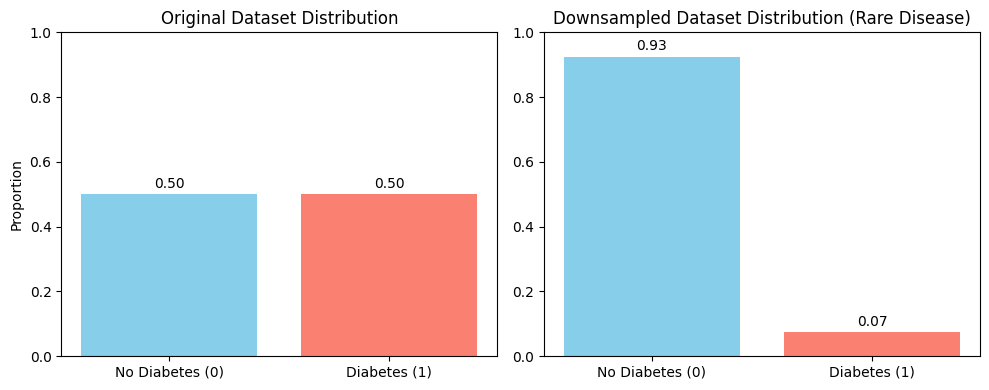

In [10]:
import matplotlib.pyplot as plt

# BEFORE: original distribution
orig_counts = df['Diabetes_binary'].value_counts(normalize=True)
orig_labels = ['No Diabetes (0)', 'Diabetes (1)']

# AFTER: downsampled distribution
rare_counts = df_rare['Diabetes_binary'].value_counts(normalize=True)

# Plotting side-by-side bar charts
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Original
ax[0].bar(orig_labels, orig_counts, color=['skyblue', 'salmon'])
ax[0].set_title('Original Dataset Distribution')
ax[0].set_ylabel('Proportion')
ax[0].set_ylim(0, 1)
for i, v in enumerate(orig_counts):
    ax[0].text(i, v + 0.02, f"{v:.2f}", ha='center')

# Downsampled
ax[1].bar(orig_labels, rare_counts, color=['skyblue', 'salmon'])
ax[1].set_title('Downsampled Dataset Distribution (Rare Disease)')
ax[1].set_ylim(0, 1)
for i, v in enumerate(rare_counts):
    ax[1].text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()


In [17]:
# Dropping the target column
X = df_rare.drop(columns=["Diabetes_binary"])
y = df_rare["Diabetes_binary"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
import pandas as pd

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [19]:
from sklearn.model_selection import train_test_split
#spliting the dataset for traaining and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logreg = LogisticRegression(max_iter = 5000 , random_state= 42)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



Confusion Matrix:
 [[7073   26]
 [ 521   23]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      7099
         1.0       0.47      0.04      0.08       544

    accuracy                           0.93      7643
   macro avg       0.70      0.52      0.52      7643
weighted avg       0.90      0.93      0.90      7643


Accuracy Score: 0.9284312442758079


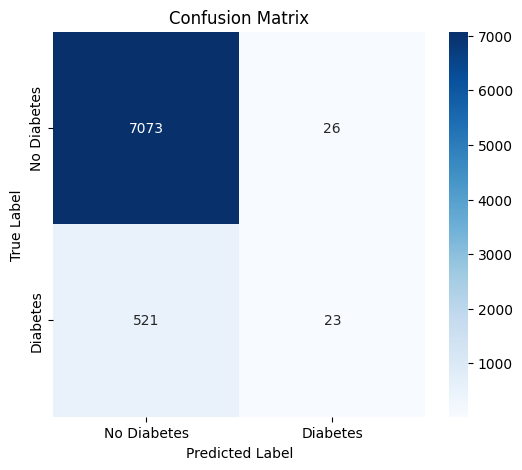

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      7099
         1.0       0.28      0.02      0.04       544

    accuracy                           0.93      7643
   macro avg       0.60      0.51      0.50      7643
weighted avg       0.88      0.93      0.90      7643



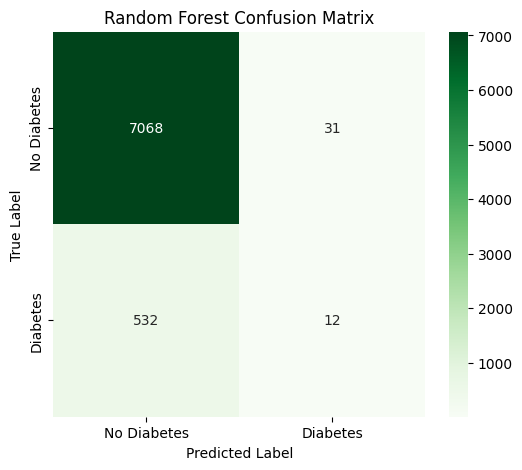

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()


# Using SMOTE

In [43]:
df_rare.shape

(38211, 22)

In [12]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train on oversampled data
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()

lr.fit(X_resampled, y_resampled)
rf.fit(X_resampled, y_resampled)

# Evaluate on original test set
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


# SMOTE
Simple and effective for initial balancing. Good first choice.

In [13]:

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train on oversampled data
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()

lr.fit(X_resampled, y_resampled)
rf.fit(X_resampled, y_resampled)

# Evaluate on original test set
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Report:
               precision    recall  f1-score   support

         0.0       0.98      0.73      0.84      7099
         1.0       0.19      0.81      0.30       544

    accuracy                           0.74      7643
   macro avg       0.58      0.77      0.57      7643
weighted avg       0.92      0.74      0.80      7643

Random Forest Report:
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      7099
         1.0       0.34      0.05      0.09       544

    accuracy                           0.93      7643
   macro avg       0.63      0.52      0.53      7643
weighted avg       0.89      0.93      0.90      7643



In [26]:
from collections import Counter
print(Counter(y_resampled))


Counter({0.0: 28247, 1.0: 28247})


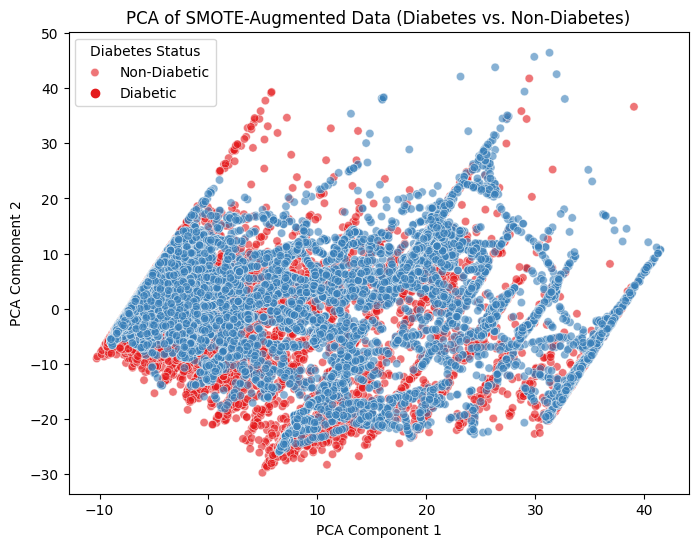

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA on the SMOTE data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_resampled, palette='Set1', alpha=0.6)
plt.title('PCA of SMOTE-Augmented Data (Diabetes vs. Non-Diabetes)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Diabetes Status', labels=['Non-Diabetic', 'Diabetic'])
plt.show()


In [49]:
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train on oversampled data
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()

lr.fit(X_resampled, y_resampled)
rf.fit(X_resampled, y_resampled)

# Evaluate on original test set
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Report:
               precision    recall  f1-score   support

         0.0       0.96      0.85      0.90      7099
         1.0       0.23      0.56      0.32       544

    accuracy                           0.83      7643
   macro avg       0.59      0.71      0.61      7643
weighted avg       0.91      0.83      0.86      7643

Random Forest Report:
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      7099
         1.0       0.39      0.05      0.09       544

    accuracy                           0.93      7643
   macro avg       0.66      0.52      0.52      7643
weighted avg       0.89      0.93      0.90      7643



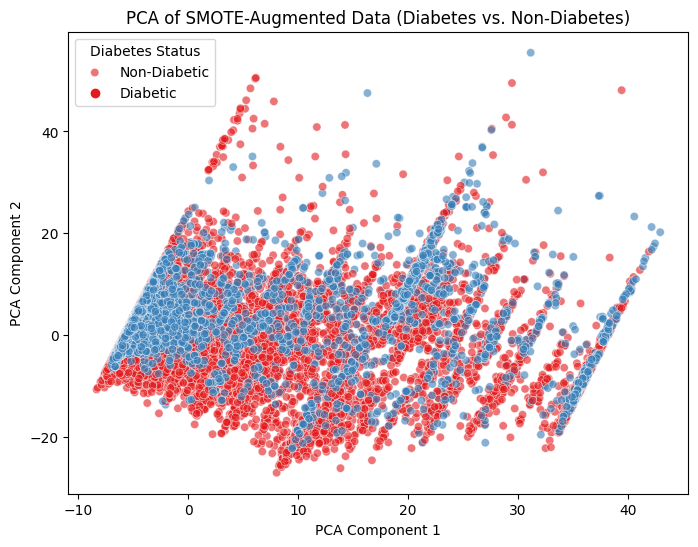

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA on the SMOTE data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_resampled, palette='Set1', alpha=0.6)
plt.title('PCA of SMOTE-Augmented Data (Diabetes vs. Non-Diabetes)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Diabetes Status', labels=['Non-Diabetic', 'Diabetic'])
plt.show()


# Borderline-SMOTE
Focuses on positive samples near the decision boundary, which helps improve recall while avoiding synthetic noise.

In [16]:

from imblearn.over_sampling import BorderlineSMOTE
smote = BorderlineSMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [34]:

# Train on oversampled data
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()

lr.fit(X_resampled, y_resampled)
rf.fit(X_resampled, y_resampled)

# Evaluate on original test set
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Report:
               precision    recall  f1-score   support

         0.0       0.97      0.76      0.86      7099
         1.0       0.19      0.74      0.31       544

    accuracy                           0.76      7643
   macro avg       0.58      0.75      0.58      7643
weighted avg       0.92      0.76      0.82      7643

Random Forest Report:
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      7099
         1.0       0.32      0.05      0.08       544

    accuracy                           0.93      7643
   macro avg       0.63      0.52      0.52      7643
weighted avg       0.89      0.93      0.90      7643



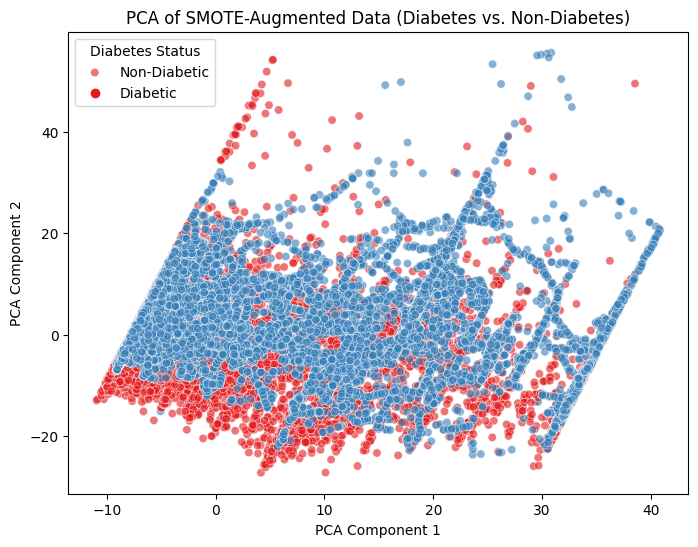

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA on the SMOTE data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_resampled, palette='Set1', alpha=0.6)
plt.title('PCA of SMOTE-Augmented Data (Diabetes vs. Non-Diabetes)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Diabetes Status', labels=['Non-Diabetic', 'Diabetic'])
plt.show()


# ADASYN
Useful if you suspect the model struggles with hard-to-classify positives. It targets those areas.

In [36]:
from imblearn.over_sampling import ADASYN
smote = ADASYN(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [37]:

# Train on oversampled data
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()

lr.fit(X_resampled, y_resampled)
rf.fit(X_resampled, y_resampled)

# Evaluate on original test set
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Report:
               precision    recall  f1-score   support

         0.0       0.98      0.72      0.83      7099
         1.0       0.18      0.81      0.30       544

    accuracy                           0.73      7643
   macro avg       0.58      0.77      0.57      7643
weighted avg       0.92      0.73      0.80      7643

Random Forest Report:
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      7099
         1.0       0.34      0.05      0.08       544

    accuracy                           0.93      7643
   macro avg       0.63      0.52      0.52      7643
weighted avg       0.89      0.93      0.90      7643



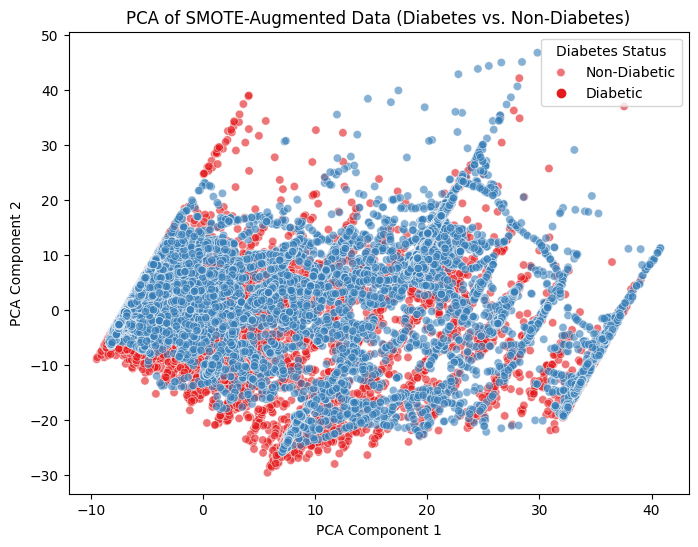

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA on the SMOTE data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_resampled, palette='Set1', alpha=0.6)
plt.title('PCA of SMOTE-Augmented Data (Diabetes vs. Non-Diabetes)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Diabetes Status', labels=['Non-Diabetic', 'Diabetic'])
plt.show()


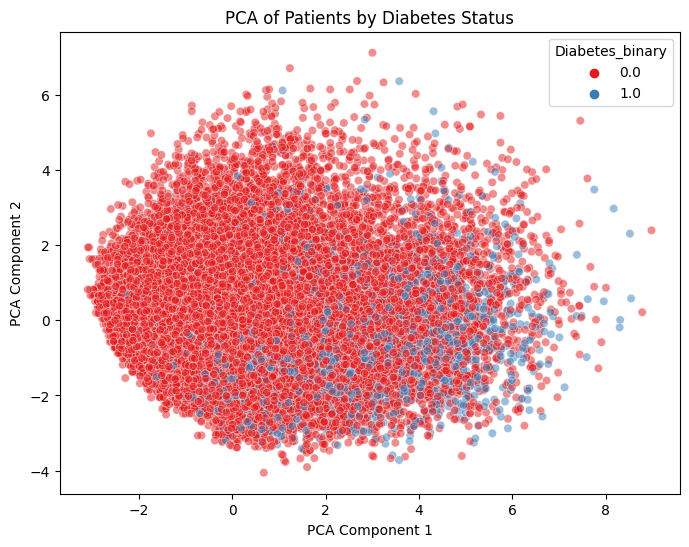

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_rare.drop('Diabetes_binary', axis=1)
y = df_rare['Diabetes_binary']

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set1', alpha=0.5)
plt.title('PCA of Patients by Diabetes Status')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [39]:
from collections import Counter
print(Counter(y_resampled))


Counter({0.0: 28247, 1.0: 28031})


# GaussianCopula  on rare disease

In [9]:
!pip install sdv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.1/182.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 48.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 24.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1

In [10]:
positive_data = df_rare[df_rare['Diabetes_binary'] == 1].copy()


In [11]:
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata

# Prepare metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=positive_data)

# Initialize the synthesizer
synthesizer = GaussianCopulaSynthesizer(metadata)

# Fit on only positive samples
synthesizer.fit(positive_data)

# Generate synthetic positive samples
synthetic_pos = synthesizer.sample(num_rows=30000)


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:163: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:129: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [12]:
# Combine with original data
augmented_df = pd.concat([df_rare, synthetic_pos], ignore_index=True)


In [13]:
df_rare.shape

(38211, 22)

In [14]:
augmented_df.shape

(68211, 22)

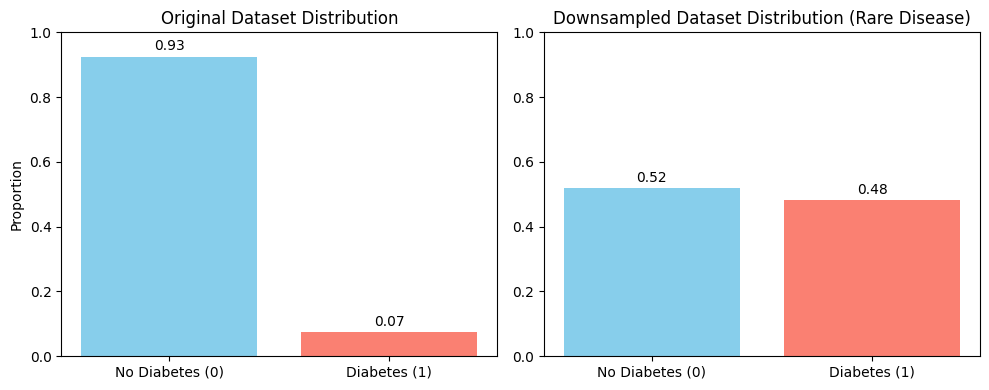

In [15]:
import matplotlib.pyplot as plt

# BEFORE: original distribution
orig_counts = df_rare['Diabetes_binary'].value_counts(normalize=True)
orig_labels = ['No Diabetes (0)', 'Diabetes (1)']

# AFTER: downsampled distribution
rare_counts = augmented_df['Diabetes_binary'].value_counts(normalize=True)

# Plotting side-by-side bar charts
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Original
ax[0].bar(orig_labels, orig_counts, color=['skyblue', 'salmon'])
ax[0].set_title('Original Dataset Distribution')
ax[0].set_ylabel('Proportion')
ax[0].set_ylim(0, 1)
for i, v in enumerate(orig_counts):
    ax[0].text(i, v + 0.02, f"{v:.2f}", ha='center')

# Downsampled
ax[1].bar(orig_labels, rare_counts, color=['skyblue', 'salmon'])
ax[1].set_title('Downsampled Dataset Distribution (Rare Disease)')
ax[1].set_ylim(0, 1)
for i, v in enumerate(rare_counts):
    ax[1].text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()


In [16]:
augmented_df.to_csv('augmented_df.csv', index=False)

In [6]:
augmented_df = pd.read_csv('/kaggle/input/agumented-rare/augmented_df.csv')

In [14]:

# Dropping the target column
X = augmented_df.drop(columns=["Diabetes_binary"])
y = augmented_df["Diabetes_binary"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

import pandas as pd

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

from sklearn.model_selection import train_test_split
#spliting the dataset for traaining and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logreg = LogisticRegression(max_iter = 5000 , random_state= 42)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[5347 1673]
 [1485 5138]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.76      0.77      7020
         1.0       0.75      0.78      0.76      6623

    accuracy                           0.77     13643
   macro avg       0.77      0.77      0.77     13643
weighted avg       0.77      0.77      0.77     13643


Accuracy Score: 0.7685259840211097


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82      7020
         1.0       0.80      0.85      0.82      6623

    accuracy                           0.82     13643
   macro avg       0.83      0.82      0.82     13643
weighted avg       0.83      0.82      0.82     13643



In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logreg = LogisticRegression(max_iter=5000, random_state=42)

grid = GridSearchCV(logreg, param_grid, cv=5, scoring='precision')
grid.fit(X_train_scaled, y_train)

print("Best C:", grid.best_params_['C'])
best_model = grid.best_estimator_


Best C: 0.001


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logreg = LogisticRegression(
    C=0.001,
    solver='saga',
    penalty='l2',
    class_weight='balanced',
    max_iter=5000,
    random_state=42
)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



Confusion Matrix:
 [[5258 1762]
 [1330 5293]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.75      0.77      7020
         1.0       0.75      0.80      0.77      6623

    accuracy                           0.77     13643
   macro avg       0.77      0.77      0.77     13643
weighted avg       0.77      0.77      0.77     13643


Accuracy Score: 0.7733636297002126


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82      7020
         1.0       0.80      0.85      0.82      6623

    accuracy                           0.82     13643
   macro avg       0.83      0.82      0.82     13643
weighted avg       0.83      0.82      0.82     13643



In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Base model
rf = RandomForestClassifier(random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

# Grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='precision',  # or 'f1', 'recall', 'accuracy'
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.7941004844640124


In [31]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Calculate scale_pos_weight
# This helps XGBoost handle class imbalance
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale_pos_weight = neg / pos

# Step 2: Initialize and train the XGBoost classifier
xgb = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)

# Step 3: Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Step 4: Evaluate the model
print("Extreme Gradient Boosting Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


Extreme Gradient Boosting Report:
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85      7020
         1.0       0.83      0.86      0.84      6623

    accuracy                           0.84     13643
   macro avg       0.84      0.85      0.84     13643
weighted avg       0.85      0.84      0.84     13643

Confusion Matrix:
[[5830 1190]
 [ 927 5696]]


In [32]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Calculate scale_pos_weight
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale_pos_weight = neg / pos

# Step 2: Initialize and train the LightGBM classifier
lgbm = LGBMClassifier(
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

lgbm.fit(X_train, y_train)

# Step 3: Predict on the test set
y_pred_lgbm = lgbm.predict(X_test)

# Step 4: Evaluate the model
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 26242, number of negative: 28326
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 54568, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.480905 -> initscore=-0.076419
[LightGBM] [Info] Start training from score -0.076419
LightGBM Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84      7020
         1.0       0.81      0.87      0.84      6623

    accuracy                           0.84     13643
   macro avg       0.84      0.84      0.84     13643
weighted avg       0.84      0.84      0.84     13643

Confusion Matrix:
[[5697 1323]
 [ 847 5776]]


In [33]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Calculate class weights
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
total = neg + pos
class_weights = [total / (2 * neg), total / (2 * pos)]

# Step 2: Initialize and train the CatBoost classifier
catboost = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    class_weights=class_weights,
    eval_metric='Logloss',
    verbose=0,
    random_state=42
)

catboost.fit(X_train, y_train)

# Step 3: Predict on the test set
y_pred_catboost = catboost.predict(X_test)

# Step 4: Evaluate the model
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_catboost))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_catboost))


CatBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      7020
         1.0       0.83      0.87      0.85      6623

    accuracy                           0.85     13643
   macro avg       0.85      0.85      0.85     13643
weighted avg       0.85      0.85      0.85     13643

Confusion Matrix:
[[5842 1178]
 [ 878 5745]]


In [35]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Base models
base_learners = [
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
                          use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Meta model (blender)
meta_model = LogisticRegression(max_iter=1000)

# Stacking
stacked = StackingClassifier(estimators=base_learners, final_estimator=meta_model, cv=3)
stacked.fit(X_train, y_train)

y_pred_stack = stacked.predict(X_test)

print("Stacked Ensemble Report:")
print(classification_report(y_test, y_pred_stack))
print(confusion_matrix(y_test, y_pred_stack))


Stacked Ensemble Report:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      7020
         1.0       0.83      0.85      0.84      6623

    accuracy                           0.85     13643
   macro avg       0.85      0.85      0.85     13643
weighted avg       0.85      0.85      0.85     13643

[[5893 1127]
 [ 967 5656]]
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.2s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.4s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   4.2s
[CV] END class_weight=balanced, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   4.2s
[CV] END class_weight=balanced, max_depth=10, max

In [17]:
import pandas as pd
from scipy.stats import ks_2samp

# Optional: Drop target column if included
features = [col for col in df.columns if col != 'Diabetes_binary']

# Run KS test for each feature
ks_results = []

for col in features:
    stat, p_value = ks_2samp(df[col], augmented_df[col])
    ks_results.append({
        'Feature': col,
        'KS Statistic': round(stat, 4),
        'P-Value': round(p_value, 4),
        'Same Distribution': p_value > 0.05  # Null hypothesis: same distribution
    })

# Convert results to DataFrame
ks_df = pd.DataFrame(ks_results)
ks_df.sort_values(by='KS Statistic', ascending=False, inplace=True)

# Display
print(ks_df)


                 Feature  KS Statistic  P-Value  Same Distribution
15              PhysHlth        0.0396   0.0000              False
3                    BMI        0.0296   0.0000              False
14              MentHlth        0.0269   0.0000              False
13               GenHlth        0.0126   0.0000              False
4                 Smoker        0.0121   0.0001              False
0                 HighBP        0.0117   0.0002              False
9                Veggies        0.0104   0.0010              False
12           NoDocbcCost        0.0096   0.0034              False
18                   Age        0.0096   0.0035              False
7           PhysActivity        0.0086   0.0122              False
20                Income        0.0081   0.0219              False
1               HighChol        0.0070   0.0680               True
16              DiffWalk        0.0056   0.2281               True
6   HeartDiseaseorAttack        0.0048   0.4020               

# Privacy of synthetic data for rare disease

# Membership Inference Attack (MIA)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Label the datasets
df_copy = df.copy()
augmented_copy = augmented_df.copy()

df_copy['is_real'] = 1
augmented_copy['is_real'] = 0

combined_df = pd.concat([df_copy, augmented_copy], ignore_index=True)

# Features and label
X = combined_df.drop(columns=['is_real', 'Diabetes_binary'])
y = combined_df['is_real']

# Train a classifier to distinguish real vs. synthetic
X_train_priv, X_test_priv, y_train_priv, y_test_priv = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_priv, y_train_priv)

y_pred_priv = clf.predict(X_test_priv)
accuracy = accuracy_score(y_test_priv, y_pred_priv)

print(f"Privacy attack classifier accuracy: {accuracy:.4f}")


Privacy attack classifier accuracy: 0.4166


# Distance-Based Disclosure Risk

In [9]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Drop target column
X_real = df.drop(columns='Diabetes_binary')
X_synth = augmented_df.drop(columns='Diabetes_binary')

# Fit nearest neighbors on real data
nn = NearestNeighbors(n_neighbors=1)
nn.fit(X_real)

# Find closest real record for each synthetic
distances, _ = nn.kneighbors(X_synth)

# Analyze distances
print(f"Average minimum distance: {np.mean(distances):.4f}")
print(f"Min distance: {np.min(distances):.4f}")
print(f"Max distance: {np.max(distances):.4f}")


Average minimum distance: 1.0218
Min distance: 0.0000
Max distance: 10.1489


#  Train on Synthetic, Test on Real (TSTR)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train on synthetic
X_synth = augmented_df.drop(columns='Diabetes_binary')
y_synth = augmented_df['Diabetes_binary']

X_real = df.drop(columns='Diabetes_binary')
y_real = df['Diabetes_binary']

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.3, random_state=42)

# Fit on synthetic, evaluate on real
lr = LogisticRegression(max_iter=5000)
lr.fit(X_synth, y_synth)
y_pred_real = lr.predict(X_test_real)

print("TSTR - Logistic Regression (Train Synthetic, Test Real):")
print(classification_report(y_test_real, y_pred_real))


TSTR - Logistic Regression (Train Synthetic, Test Real):
              precision    recall  f1-score   support

         0.0       0.73      0.76      0.75     10601
         1.0       0.75      0.72      0.74     10607

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Separate features and target from real and synthetic data
X_real = df.drop(columns=["Diabetes_binary"])
y_real = df["Diabetes_binary"]

X_synth = augmented_df.drop(columns=["Diabetes_binary"])
y_synth = augmented_df["Diabetes_binary"]

# Standardize using real data statistics
scaler = StandardScaler()
X_real_scaled = scaler.fit_transform(X_real)
X_synth_scaled = scaler.transform(X_synth)

# Train logistic regression on real data
model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_real_scaled, y_real)

# Predict on synthetic data
y_pred = model.predict(X_synth_scaled)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_synth, y_pred))
print("\nClassification Report:\n", classification_report(y_synth, y_pred))
print("\nAccuracy Score:", accuracy_score(y_synth, y_pred))


Confusion Matrix:
 [[25747  9599]
 [ 6678 26187]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.73      0.76     35346
         1.0       0.73      0.80      0.76     32865

    accuracy                           0.76     68211
   macro avg       0.76      0.76      0.76     68211
weighted avg       0.76      0.76      0.76     68211


Accuracy Score: 0.7613727991086482


#  Correlation Matrix Comparison (Real vs. Synthetic)

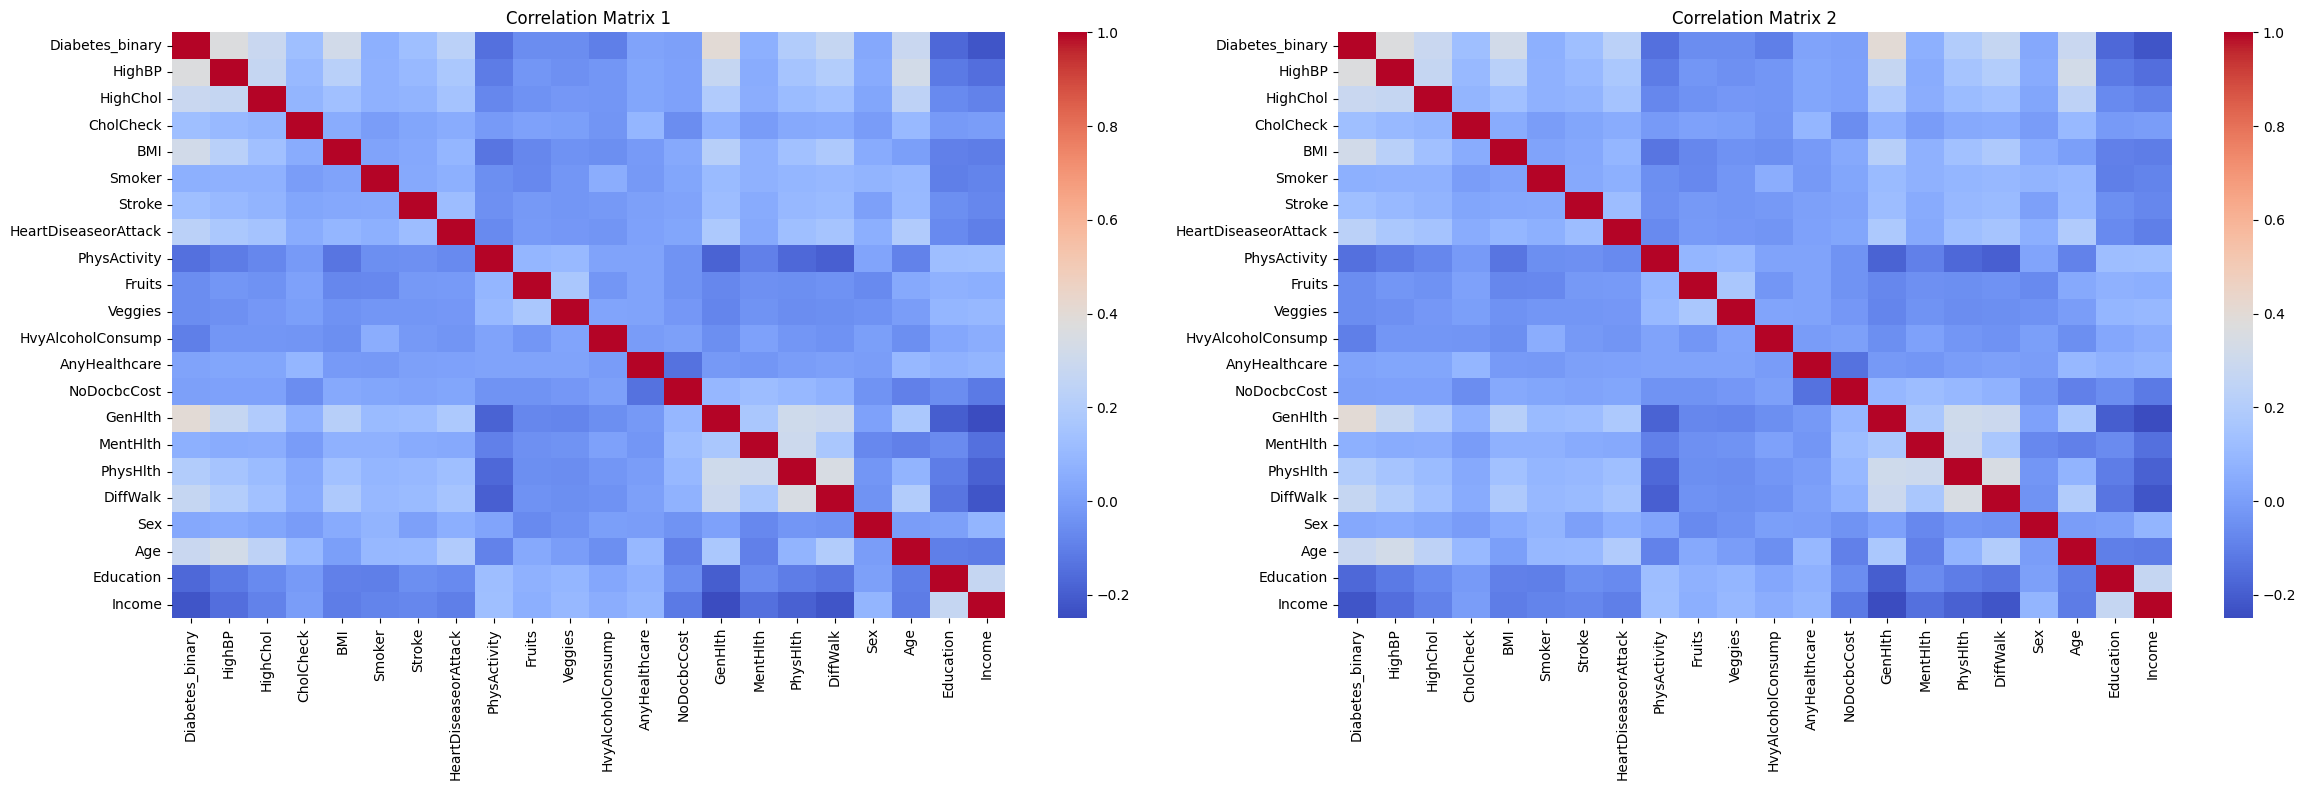

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))  # Total width is double for two plots

# First heatmap
sns.heatmap(augmented_df.corr(), annot=False, cmap='coolwarm', ax=ax1)
ax1.set_title("Correlation Matrix 1")

# Second heatmap
sns.heatmap(augmented_df.corr(), annot=False, cmap='coolwarm', ax=ax2)
ax2.set_title("Correlation Matrix 2")

plt.tight_layout()  # Adjusts spacing between plots
plt.show()


# Pairplot Visualizations for Rare Class Features

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

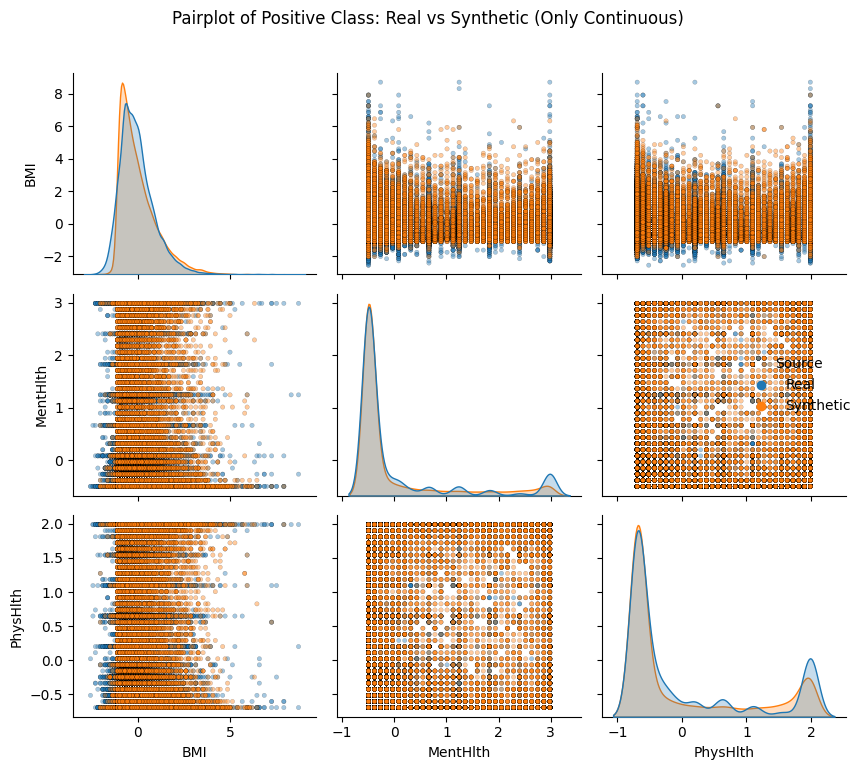

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Subset only rare class (positive = 1)
rare_real = df[df['Diabetes_binary'] == 1].copy()
rare_synth = augmented_df[augmented_df['Diabetes_binary'] == 1].copy()

# 2. Label each dataset
rare_real['Source'] = 'Real'
rare_synth['Source'] = 'Synthetic'

# 3. Combine both
combined = pd.concat([rare_real, rare_synth], axis=0)

# 4. Select only continuous features for pairplot
features_to_plot = ['BMI', 'MentHlth', 'PhysHlth']

# 5. Scale continuous features
scaler = StandardScaler()
combined_scaled = combined.copy()
combined_scaled[features_to_plot] = scaler.fit_transform(combined[features_to_plot])

# 6. Plot pairplot
sns.pairplot(
    data=combined_scaled,
    vars=features_to_plot,
    hue='Source',
    plot_kws={'alpha': 0.4, 's': 10, 'edgecolor': 'k', 'linewidth': 0.2}
)

plt.suptitle("Pairplot of Positive Class: Real vs Synthetic (Only Continuous)", y=1.02)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


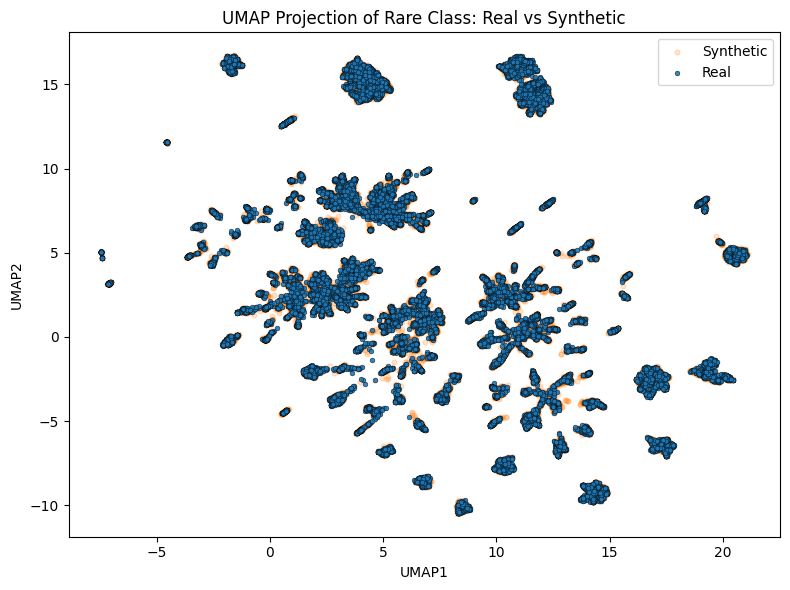

In [33]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Filter real and synthetic rare class
rare_real = df[df['Diabetes_binary'] == 1].copy()
rare_synth = augmented_df[augmented_df['Diabetes_binary'] == 1].copy()

# Add source labels
rare_real['Source'] = 'Real'
rare_synth['Source'] = 'Synthetic'

# Combine them
combined = pd.concat([rare_real, rare_synth], axis=0)

# Drop non-feature columns
features = combined.drop(columns=['Diabetes_binary', 'Source'])

# Standardize (important for UMAP)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(features_scaled)

# Convert to DataFrame for plotting
embedding_df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])
embedding_df['Source'] = combined['Source'].values

# Plot
plt.figure(figsize=(8, 6))

# Plot Synthetic first (in background, transparent)
plt.scatter(synth_subset["UMAP1"], synth_subset["UMAP2"],
            label='Synthetic', alpha=0.2, s=12, color='tab:orange')

# Plot Real on top (solid, visible)
plt.scatter(real_subset["UMAP1"], real_subset["UMAP2"],
            label='Real', alpha=0.9, s=12, color='tab:blue', edgecolor='black', linewidth=0.3)

plt.title("UMAP Projection of Rare Class: Real vs Synthetic")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend()
plt.tight_layout()
plt.show()
